2023-12-04 11:26:35.471116: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-04 11:26:35.472545: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-04 11:26:35.491769: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-04 11:26:35.491786: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-04 11:26:35.492406: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

--------------------------------
STDOUT: EXEC @predict
result[0]: hal.buffer_view
1x10xf32=[0 0 0 0 1 0 0 0 0 0]

--------------------------------
STDOUT: EXEC @predict
result[0]: hal.buffer_view
1x10xf32=[0 0 0 0 0 0 0 0 1 0]

--------------------------------
STDOUT: EXEC @predict
result[0]: hal.buffer_view
1x10xf32=[0 0 0 0 0 0 0 0 0 1]



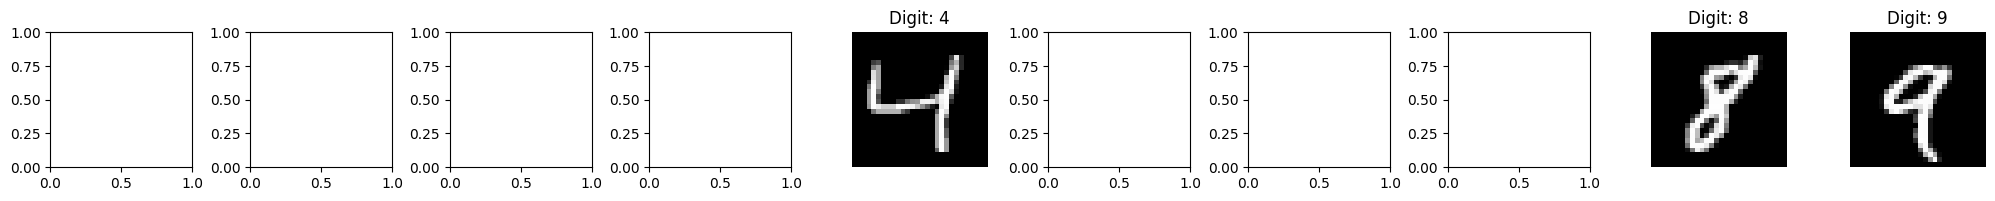

In [1]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
import numpy as np
import subprocess
# load mnist dataset
(train_images, train_labels), _ = mnist.load_data()

SHELL_PATH = '/home/cluster/workspace/PLLAB/DeployModel2RISCV/run.sh'
VMFB_NAME = 'minst_model.mlir.vmfb'
PREFIX_TENSOR_DIM = '1x28x28x1xf32='
FUNCTION_NAME = 'predict'

fig, axes = plt.subplots(1, 10, figsize=(20, 2))
target_digits = [4,8,9]
for digit in target_digits:
    print('--------------------------------')
    index = np.where(train_labels == digit)[0][0]
    flattened_arr = train_images[index].flatten()
    flattened_arr = ",".join(str(num) for num in flattened_arr)
    flattened_arr = PREFIX_TENSOR_DIM + flattened_arr
    result = subprocess.run([SHELL_PATH, VMFB_NAME, FUNCTION_NAME,flattened_arr], capture_output=True, text=True)
    print("STDOUT:", result.stdout)

    axes[digit].imshow(train_images[index], cmap='gray')
    axes[digit].set_title(f"Digit: {digit}")
    axes[digit].axis('off')
    
plt.tight_layout()
plt.show()

# target shape 1x28x28x1xf32